#Dependências

In [7]:
from load_mnist import load_data
import matplotlib.pyplot as plt
import network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
import numpy as np
from sklearn.metrics import accuracy_score




# Modelo Inicial

In [8]:
EPOCH_LENGTH = 30
MIN_BATCH_SIZE = 10
LEARNING_RATE = 3

In [9]:
training_data, validation_data, test_data = load_data()
training_data = list(training_data)
test_data = list(test_data)

In [10]:
X_train, X_test, y_train, y_test = training_data[0], test_data[0], training_data[1], test_data[1]

In [11]:
clf = MLPClassifier().fit(X_train, y_train)

In [13]:
y_pred = clf.predict(X_test)

In [14]:
for cls in np.unique(y_test):
    idx = (y_test == cls)
    acc = accuracy_score(y_test[idx], y_pred[idx])
    print(f"Accuracy for class {cls}: {acc:.2f}")

Accuracy for class 0: 0.99
Accuracy for class 1: 0.99
Accuracy for class 2: 0.98
Accuracy for class 3: 0.97
Accuracy for class 4: 0.97
Accuracy for class 5: 0.97
Accuracy for class 6: 0.98
Accuracy for class 7: 0.97
Accuracy for class 8: 0.97
Accuracy for class 9: 0.97


In [7]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.96      0.99      0.97      1010
           4       0.98      0.99      0.98       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.97      0.96      0.96       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



# Grid Search

In [8]:
parameter_space = {
    'hidden_layer_sizes': [(30,), (50,), (100,), (30, 30), (50, 50)],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam', 'sgd'],

}


from sklearn.model_selection import GridSearchCV


In [9]:

clf_tuned = GridSearchCV(clf, parameter_space, n_jobs=-1, cv=5)
clf_tuned.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(30,), (50,), (100,), (30, 30),
                                                (50, 50)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'solver': ['adam', 'sgd']})

In [10]:
results = clf_tuned.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print("Accuracy:", mean_score, "Params:", params)

best_params = clf_tuned.best_params_
bestscore = clf_tuned.best_score_

print("Best parameters:", best_params)
print("Best score:", bestscore)

Accuracy: 0.94946 Params: {'activation': 'logistic', 'hidden_layer_sizes': (30,), 'learning_rate_init': 0.001, 'solver': 'adam'}
Accuracy: 0.92018 Params: {'activation': 'logistic', 'hidden_layer_sizes': (30,), 'learning_rate_init': 0.001, 'solver': 'sgd'}
Accuracy: 0.94852 Params: {'activation': 'logistic', 'hidden_layer_sizes': (30,), 'learning_rate_init': 0.01, 'solver': 'adam'}
Accuracy: 0.9562200000000001 Params: {'activation': 'logistic', 'hidden_layer_sizes': (30,), 'learning_rate_init': 0.01, 'solver': 'sgd'}
Accuracy: 0.9241800000000001 Params: {'activation': 'logistic', 'hidden_layer_sizes': (30,), 'learning_rate_init': 0.1, 'solver': 'adam'}
Accuracy: 0.9563 Params: {'activation': 'logistic', 'hidden_layer_sizes': (30,), 'learning_rate_init': 0.1, 'solver': 'sgd'}
Accuracy: 0.96132 Params: {'activation': 'logistic', 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001, 'solver': 'adam'}
Accuracy: 0.9209200000000001 Params: {'activation': 'logistic', 'hidden_layer_sizes':

# Piores resultados

In [16]:
clf1 = MLPClassifier(activation='relu', hidden_layer_sizes=(30, 30), learning_rate_init=0.1, solver='adam').fit(X_train, y_train)
y_pred = clf1.predict(X_test)
ac1 = clf1.score(X_test, y_test)

for cls in np.unique(y_test):
    idx = (y_test == cls)
    acc = accuracy_score(y_test[idx], y_pred[idx])
    print(f"Accuracy for class {cls}: {acc:.2f}")

print()
class_report = classification_report(y_test, y_pred)
print(class_report)

Accuracy for class 0: 0.51
Accuracy for class 1: 0.93
Accuracy for class 2: 0.85
Accuracy for class 3: 0.65
Accuracy for class 4: 0.90
Accuracy for class 5: 0.77
Accuracy for class 6: 0.57
Accuracy for class 7: 0.85
Accuracy for class 8: 0.78
Accuracy for class 9: 0.82

              precision    recall  f1-score   support

           0       1.00      0.51      0.68       980
           1       1.00      0.93      0.96      1135
           2       0.63      0.85      0.73      1032
           3       0.92      0.65      0.76      1010
           4       0.69      0.90      0.78       982
           5       0.73      0.77      0.75       892
           6       0.89      0.57      0.70       958
           7       0.95      0.85      0.90      1028
           8       0.49      0.78      0.60       974
           9       0.82      0.82      0.82      1009

    accuracy                           0.77     10000
   macro avg       0.81      0.76      0.77     10000
weighted avg       0.81  

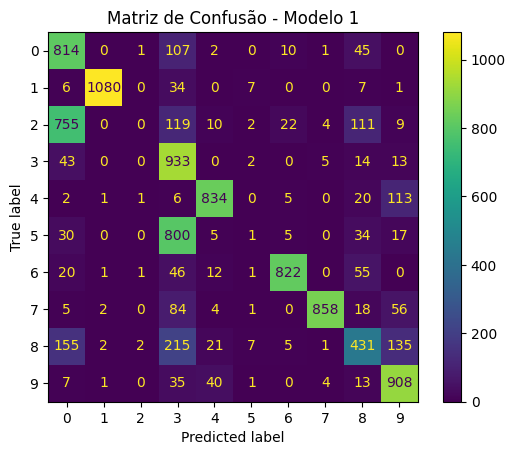

In [29]:
cm1 = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot()
plt.title('Matriz de Confusão - Modelo 1')
plt.show()


# Melhorando resultados ao modificar solver

In [17]:
clf2 = MLPClassifier(activation='relu', hidden_layer_sizes=(30, 30), learning_rate_init=0.1, solver='sgd').fit(X_train, y_train)
y_pred = clf2.predict(X_test)
ac2 = clf2.score(X_test, y_test)

for cls in np.unique(y_test):
    idx = (y_test == cls)
    acc = accuracy_score(y_test[idx], y_pred[idx])
    print(f"Accuracy for class {cls}: {acc:.2f}")

print()

class_report = classification_report(y_test, y_pred)
print(class_report)

Accuracy for class 0: 0.99
Accuracy for class 1: 0.99
Accuracy for class 2: 0.95
Accuracy for class 3: 0.97
Accuracy for class 4: 0.97
Accuracy for class 5: 0.96
Accuracy for class 6: 0.98
Accuracy for class 7: 0.96
Accuracy for class 8: 0.94
Accuracy for class 9: 0.93

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.95      0.96      1032
           3       0.94      0.97      0.95      1010
           4       0.97      0.97      0.97       982
           5       0.95      0.96      0.95       892
           6       0.96      0.98      0.97       958
           7       0.98      0.96      0.97      1028
           8       0.94      0.94      0.94       974
           9       0.97      0.93      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.97  

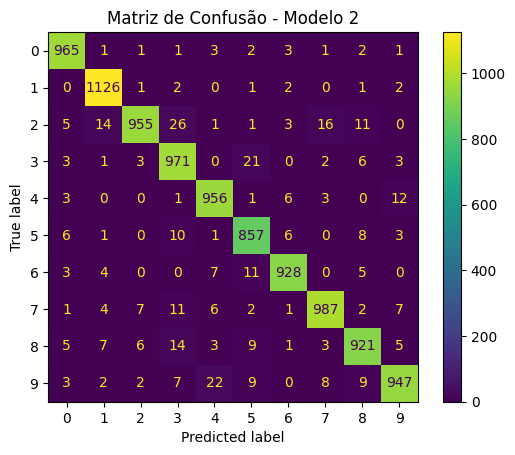

In [32]:
cm2 = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot()
plt.title('Matriz de Confusão - Modelo 2')
plt.show()


# Melhores resultados

In [18]:
clf3 = MLPClassifier(activation='relu', hidden_layer_sizes=(50, 50), learning_rate_init=0.1, solver='sgd').fit(X_train, y_train)
y_pred = clf3.predict(X_test)
ac3 = clf3.score(X_test, y_test)

for cls in np.unique(y_test):
    idx = (y_test == cls)
    acc = accuracy_score(y_test[idx], y_pred[idx])
    print(f"Accuracy for class {cls}: {acc:.2f}")

print()

class_report = classification_report(y_test, y_pred)
print(class_report)

Accuracy for class 0: 0.99
Accuracy for class 1: 0.99
Accuracy for class 2: 0.97
Accuracy for class 3: 0.97
Accuracy for class 4: 0.98
Accuracy for class 5: 0.96
Accuracy for class 6: 0.96
Accuracy for class 7: 0.96
Accuracy for class 8: 0.97
Accuracy for class 9: 0.96

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.94      0.97      0.96      1010
           4       0.97      0.98      0.97       982
           5       0.97      0.96      0.97       892
           6       0.99      0.96      0.97       958
           7       0.98      0.96      0.97      1028
           8       0.96      0.97      0.96       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97  

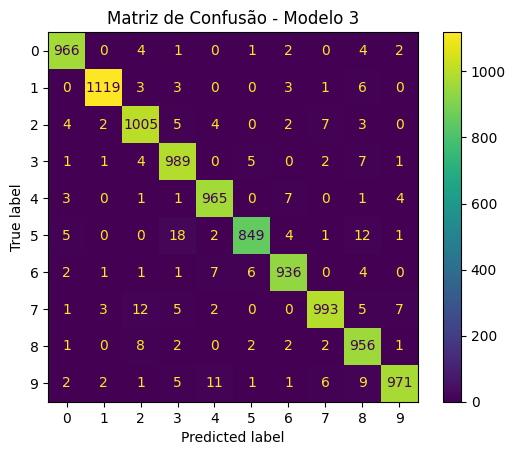

In [34]:
cm3 = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3)
disp.plot()
plt.title('Matriz de Confusão - Modelo 3')
plt.show()